In [2]:
import io
import requests
from PIL import Image
import torch
import numpy
from datasets import load_dataset
from transformers import AutoImageProcessor, AutoModelForImageClassification

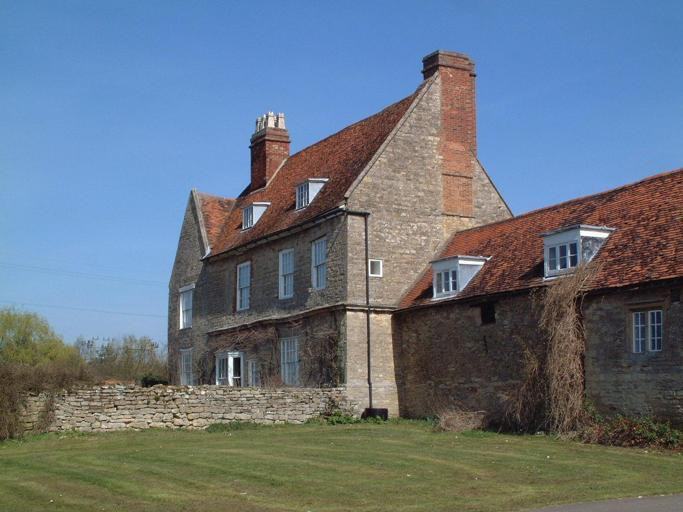

In [3]:
ds = load_dataset("hf-internal-testing/fixtures_ade20k", split="test")
image = Image.open(ds[0]['file'])
# image = Image.open(ds[0]['file']).resize((256,256))
image

In [4]:
processor = AutoImageProcessor.from_pretrained("facebook/convnextv2-huge-22k-512")
model = AutoModelForImageClassification.from_pretrained("facebook/convnextv2-huge-22k-512")

2023-11-16 09:33:06.682102: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 09:33:06.682145: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 09:33:06.684344: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
inputs = processor(images=image, return_tensors="pt")
pixel_values = inputs["pixel_values"]

In [6]:
outputs = model.forward(pixel_values)

In [7]:
pixel_values.shape

torch.Size([1, 3, 512, 512])

In [8]:
outputs[0].shape

torch.Size([1, 1000])

In [11]:
outputs = model.forward(pixel_values,output_hidden_states=True)

In [15]:
[outputs[1][i].shape for i in range(5)]

[torch.Size([1, 352, 128, 128]),
 torch.Size([1, 352, 128, 128]),
 torch.Size([1, 704, 64, 64]),
 torch.Size([1, 1408, 32, 32]),
 torch.Size([1, 2816, 16, 16])]

In [ ]:
outputs = model.convnextv2.encoder.forward
(pixel_values,output_hidden_states=True)

In [ ]:
model.convnextv2.forward

In [17]:
import matplotlib.pyplot as plt

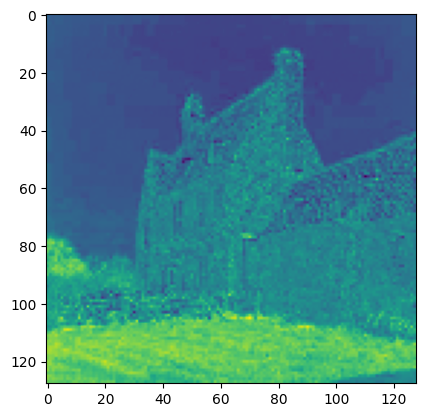

In [18]:
plt.imshow(outputs[1][0][0][0].detach())

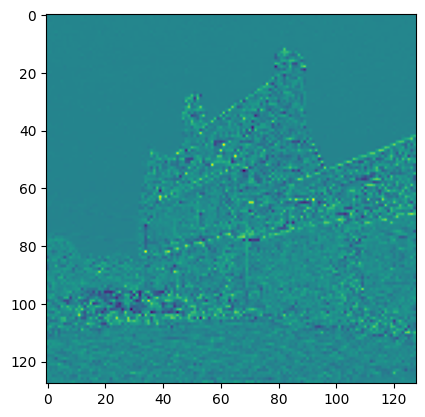

In [19]:
plt.imshow(outputs[1][0][0][1].detach())

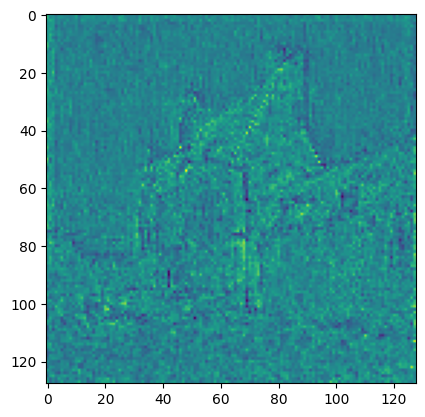

In [20]:
plt.imshow(outputs[1][1][0][0].detach())

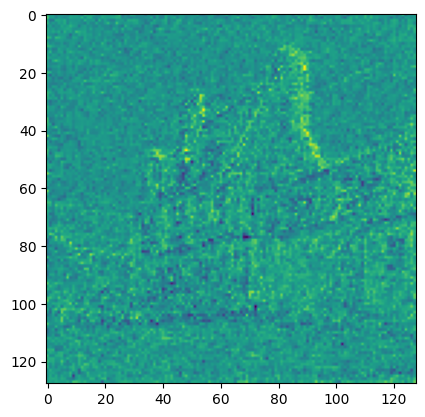

In [21]:
plt.imshow(outputs[1][1][0][1].detach())

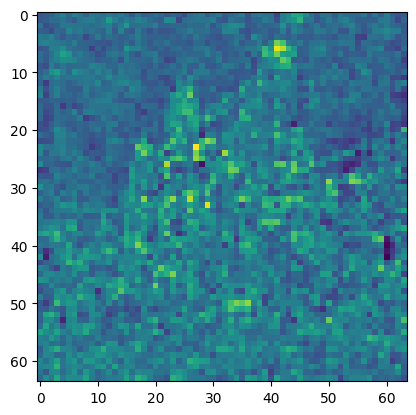

In [22]:
plt.imshow(outputs[1][2][0][0].detach())

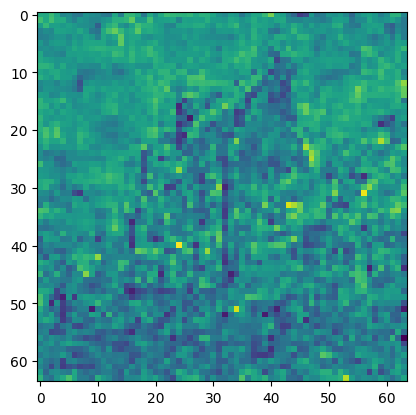

In [23]:
plt.imshow(outputs[1][2][0][1].detach())

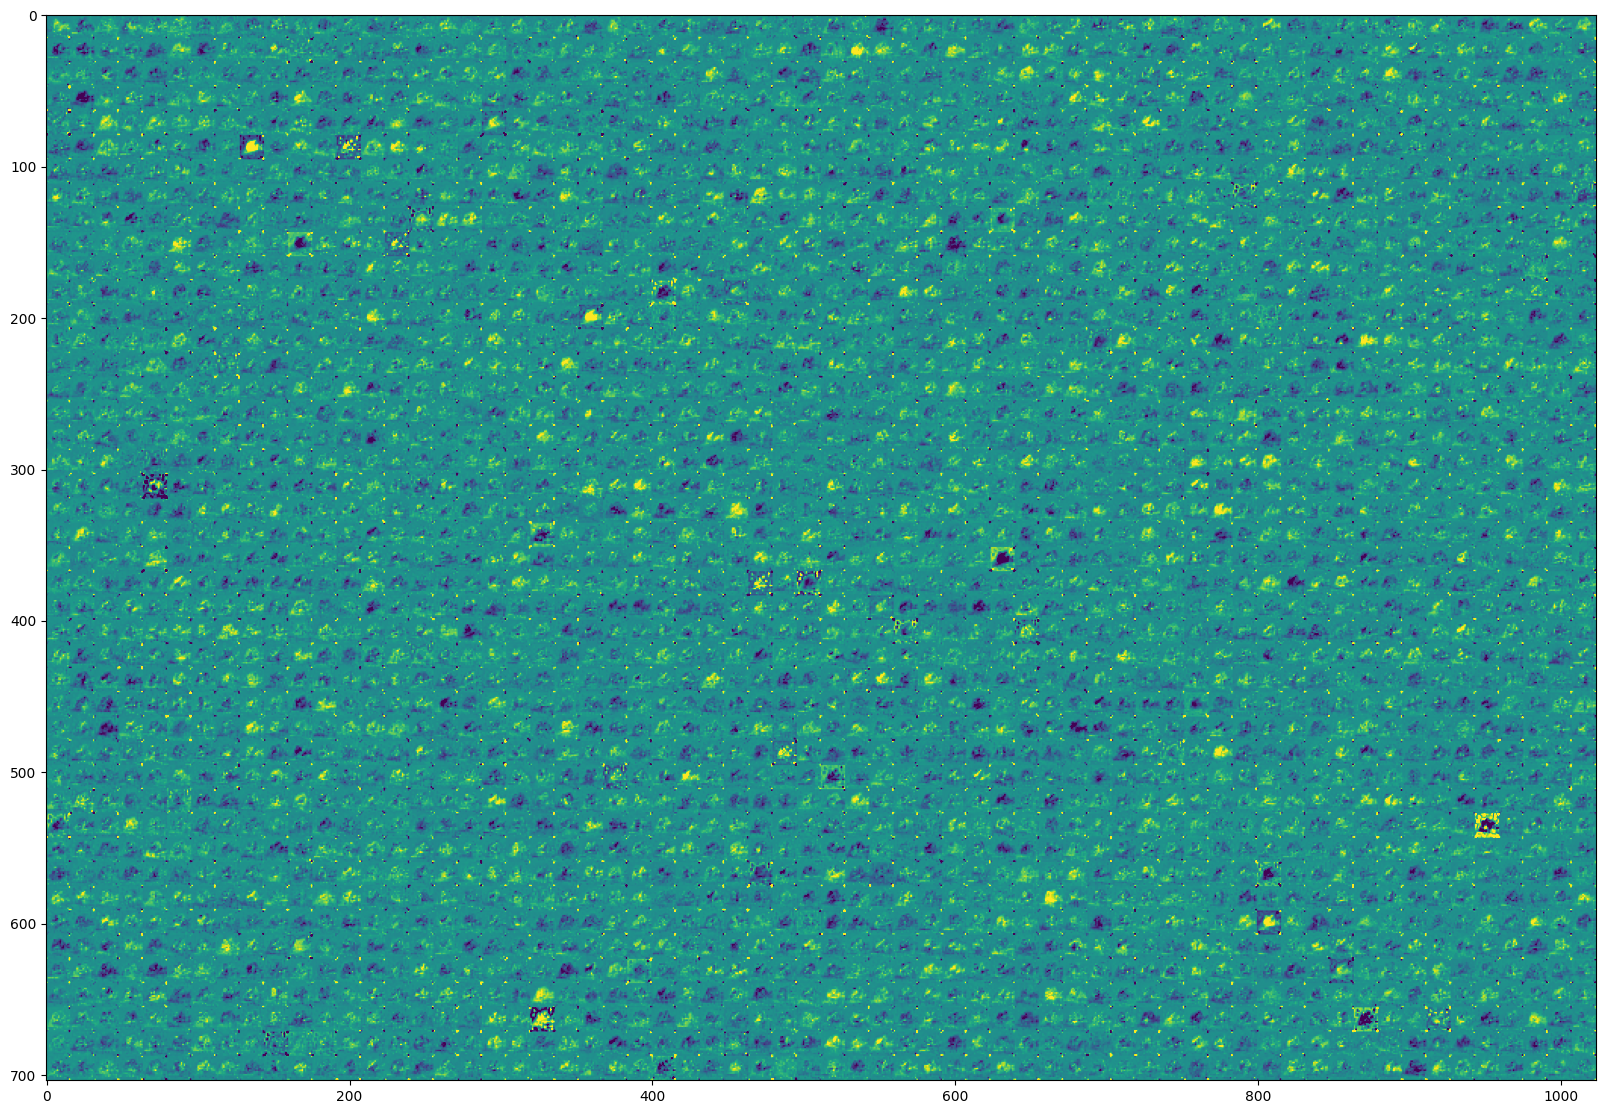

In [54]:
grid_tensor = outputs[1][4].detach().view(44, 64, 16, 16)
plt.figure(figsize=(20,16),dpi=100)
final_image = np.zeros((44*16, 64*16))
for i in range(44):
    for j in range(64):
        final_image[i*16:(i+1)*16, j*16:(j+1)*16] = grid_tensor[i, j, :, :]
plt.imshow(final_image)
plt.clim([-10,10])